# PyTorch Workflow

What does this notebook contain ?

1) Data: Prepare and load.
2) Build Model.
3) Fitting model to data (training).
4) Making predictions and evauluating a model (inference).
5) Saving and loading a model.
6) Putting it all together.

In [1]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks.
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.3.0+cu121'

# 1. Data (Perpairing and Loading)

## Creating a simple dataset using linear regression

Data can be almost anythin... in machine learning

* Excel spreadsheets
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some **known** data using the linear regression formula.

We will using a linear regression formula to make a straight line with known **parameters**

In [158]:
X = torch.arange(0,1,0.02)
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [2]:
# Create *known* parameters

weight = 0.9
bias = 0.3


# Create
start = 0
end = 1
step = 0.02
# X = torch.arange(start,end,step)
# print(X)
X = torch.arange(start, end, step).unsqueeze(dim=1) #unsqueeze adds an extra dimension as mentioned.
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3180],
         [0.3360],
         [0.3540],
         [0.3720],
         [0.3900],
         [0.4080],
         [0.4260],
         [0.4440],
         [0.4620]]))

In [3]:
len(X), len(y)

(50, 50)

# Splitting our data into training and test sets (Very important)

Ideally we keep 60%-80% of the data in the training set and 10%-20% of out data in training set

## Creating a training and test set with our data



In [4]:
# create a train/test split


train_split = int(0.8 * len(X))
train_split


40

In [5]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3180],
         [0.3360],
         [0.3540],
         [0.3720],
         [0.3900],
         [0.4080],
         [0.4260],
         [0.4440],
         [0.4620],
         [0.4800],
         [0.4980],
         [

## How might we better visualize our data ?

This is where the data explorer's motto comes in

"Visualize, Visualize, Visualize"

In [7]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions ?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r",s=4, label="Predictions")

    #show lengend
    plt.legend(prop={"size":14})

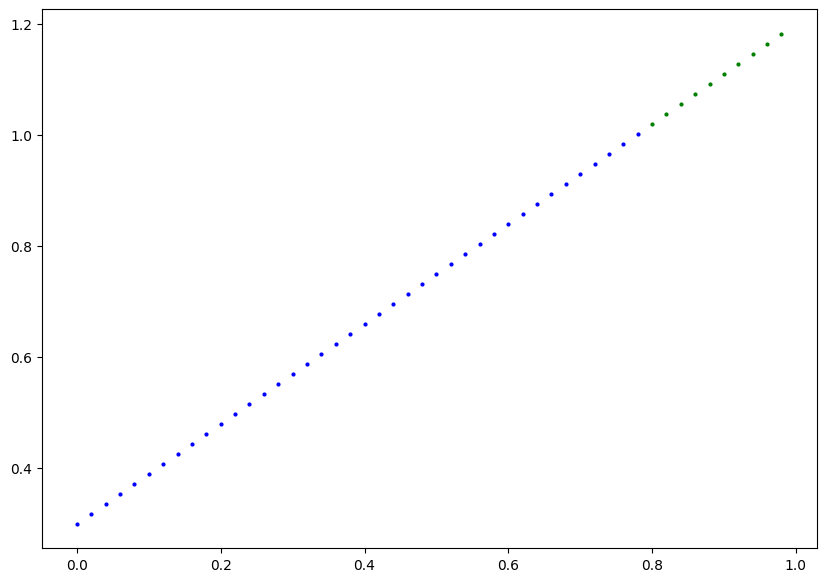

In [8]:
plot_predictions()

# 2. Building Model

We will build a linear regression model using PyTorch

Formula = wx + b

What our model does ?

* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so ?

Through two main algorithms:
1. Gradient Descent
2. Backpropagation


In [9]:
# Create a linear regression model class

from torch import nn

class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, # start with a random weight and try to adjust it to the ideal weight
                                           requires_grad=True, # can this parameter be updated via gradient descent ?
                                           dtype=torch.float)) #PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.rand(1, # start with a random weight and try to adjust it to the ideal weight
                                        requires_grad=True, # can this parameter be updated via gradient descent ?
                                        dtype=torch.float)) #PyTorch loves the datatype torch.float32

  #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
    return self.weights * x + self.bias #this is the linear regression formula


### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)

* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.

* torch.nn.Module - The base class for all neural network modules, if you subclass it you should overwrite forward() method.

* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent.

* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computations

## Checking out the contents of our PyTorch model

we can check our model parameters using .parameters()

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

model_0

# checkout the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [11]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

## Making predictions using `torch.inference_mode()`

To check our model's predictive power, let;s see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it is going to run it through the forward() method.

In [12]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [13]:
y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

In [14]:
# Make predictions with model

with torch.inference_mode(): #it turns of the gradient tracking
  y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [15]:
y_test

tensor([[1.0200],
        [1.0380],
        [1.0560],
        [1.0740],
        [1.0920],
        [1.1100],
        [1.1280],
        [1.1460],
        [1.1640],
        [1.1820]])

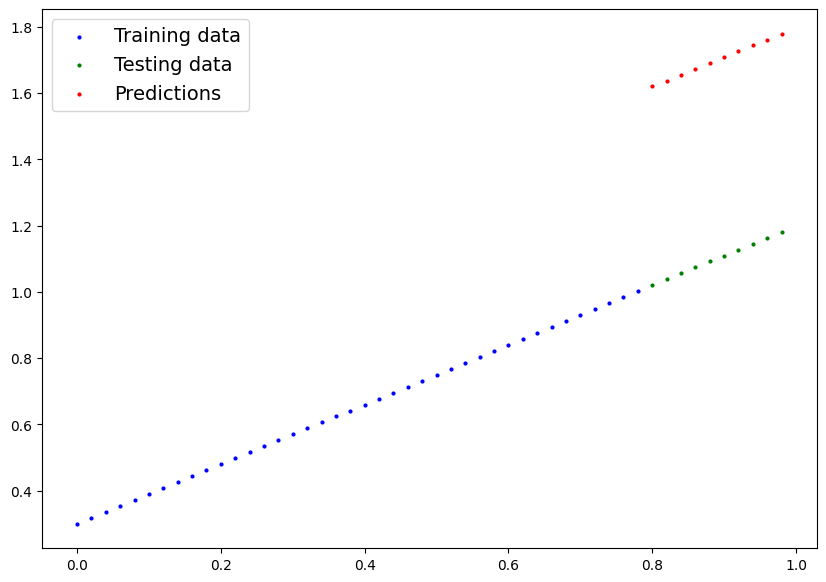

In [16]:
plot_predictions(predictions=y_preds)

## 3. Training the model

The whole idea of training is for a model to move from some *unknown* paramaters (these may be random) to some to *known* parameters.

or in other words from a poor representation of data to a good representation of data.

One way to measure how poor or how wrong your models predictions are is to use loss functions.

Thing we nee to train a model:

* **Loss Function**: A function to measure how wrong a models predictions are to the ideal output. Lower the better.

* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters(e.g. weight and bias) to improve the loss function.

Inside the optimizer you will have:
* params - the model parameters you had like to optimize. In our case it is params = model_0.parameters()
* lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small change, a large lr will result in large change.)

Specifically for PyTorch, we need:

* A training loop
* A testing loop


In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [18]:
#check out our model's parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Setting up loss function and optimizer

In [19]:
# Setup a loss function
loss_fn = nn.L1Loss()



# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01, #lr is learning rate = possibly the most important hyperparameter you can set.
                            )

In [20]:
loss_fn

L1Loss()

In [21]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Building a training loop and a testing loop in PyTorch

A couple of thing we need in a training loop:
0. Loop throught the data
1. Forward pass (this involves data moving through our model's forward()) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards throught the netowrk to calculate the gradients of each of the paramaeters of our model with respect to the loss (**backpropagation**)
5. Optimizer Step - use the optimizer to adjust our model's parameters to try and improve the loss. (**gradient descent**)

In [22]:
model_0.parameters()

<generator object Module.parameters at 0x7827e174ee30>

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [24]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we have set it ourselves).

epochs = 200

#Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# loop throught the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2.Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss:{loss}")

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate throught the loop so we have to zero them above in step3 for the next iteration of the loop.


  ### Testing
  model_0.eval() # It turns off different settings in the model not needed for evaluating/testing (dropout/batch norm)
  with torch.inference_mode(): #turns off gradient tracking and a couple more things behind the scenes.
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print our model state_dict()
    print(model_0.state_dict())


Loss:0.6080889701843262
Epoch: 0 | Loss: 0.6080889701843262 | Test loss: 0.5857526659965515
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Loss:0.5965679883956909
Loss:0.5850470066070557
Loss:0.5735260248184204
Loss:0.5620050430297852
Loss:0.5504840612411499
Loss:0.5389630794525146
Loss:0.5274420976638794
Loss:0.5159210562705994
Loss:0.5044001340866089
Loss:0.49287909269332886
Epoch: 10 | Loss: 0.49287909269332886 | Test loss: 0.4510428309440613
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
Loss:0.481358140707016
Loss:0.46983709931373596
Loss:0.4583161473274231
Loss:0.44679516553878784
Loss:0.4352741241455078
Loss:0.42375317215919495
Loss:0.4122322201728821
Loss:0.40071120858192444
Loss:0.3891902267932892
Loss:0.37766918540000916
Epoch: 20 | Loss: 0.37766918540000916 | Test loss: 0.31633299589157104
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])
Loss:0.3661482632160187
Loss:0.35462722182273865
Loss:0.3431062

In [25]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.6081, grad_fn=<MeanBackward0>),
  tensor(0.4929, grad_fn=<MeanBackward0>),
  tensor(0.3777, grad_fn=<MeanBackward0>),
  tensor(0.2625, grad_fn=<MeanBackward0>),
  tensor(0.1472, grad_fn=<MeanBackward0>),
  tensor(0.0525, grad_fn=<MeanBackward0>),
  tensor(0.0413, grad_fn=<MeanBackward0>),
  tensor(0.0376, grad_fn=<MeanBackward0>),
  tensor(0.0341, grad_fn=<MeanBackward0>),
  tensor(0.0307, grad_fn=<MeanBackward0>),
  tensor(0.0272, grad_fn=<MeanBackward0>),
  tensor(0.0238, grad_fn=<MeanBackward0>),
  tensor(0.0204, grad_fn=<MeanBackward0>),
  tensor(0.0169, grad_fn=<MeanBackward0>),
  tensor(0.0135, grad_fn=<MeanBackward0>),
  tensor(0.0101, grad_fn=<MeanBackward0>),
  tensor(0.0066, grad_fn=<MeanBackward0>),
  tensor(0.0032, grad_fn=<MeanBackward0>),
  tensor(0.0061, grad_fn=<MeanBackward0>),
  tensor(0.0061, grad_fn=<MeanBackward0>)],
 [tensor(

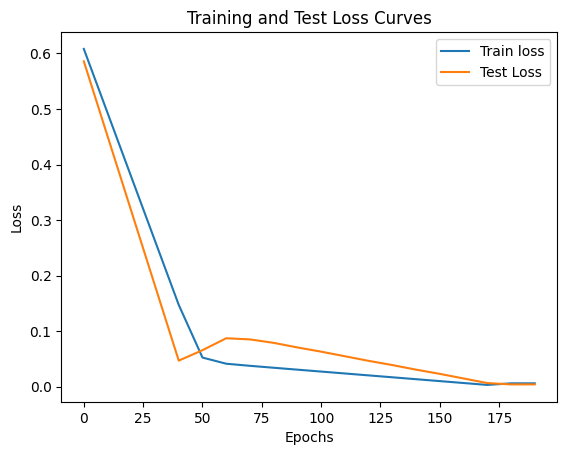

In [26]:
# Plot the loss curves

import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [182]:
weight, bias

(0.9, 0.3)

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8934])), ('bias', tensor([0.2965]))])

In [28]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

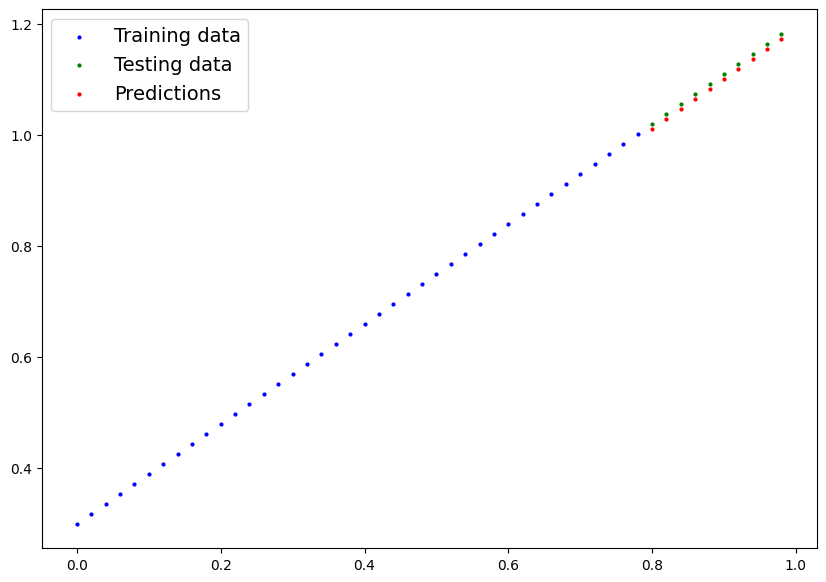

In [29]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods to saving and loading the model in PyTorh.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format.

2. `torch.load()` - allows you to load a saved PyTorch object.

3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8934])), ('bias', tensor([0.2965]))])

In [43]:
# Saving our PyTorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [44]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jul 15 07:30 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire mode, we wil create a new instance of our model class and load the saved `state_dict()` into that.

In [45]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8934])), ('bias', tensor([0.2965]))])

In [46]:
# To load in a saved state_dict we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance of our model with the updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [47]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.8934])), ('bias', tensor([0.2965]))])

In [48]:
# Make some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[1.0112],
        [1.0291],
        [1.0470],
        [1.0649],
        [1.0827],
        [1.1006],
        [1.1185],
        [1.1363],
        [1.1542],
        [1.1721]])

In [50]:
# Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 6. Putting it all together

Let's got back through the steps above and see it all in one place

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# checking pytorch version

torch.__version__

'2.3.0+cu121'

Create device-agnostic code.

This means if we have got access to GPU, our code will use it (for potentially faster computing). If no GPU available the code will use CPU by default.

In [3]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [4]:
!nvidia-smi

Wed Jul 17 07:01:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 6.1 Data

In [100]:
# Create some data using the linear regression formula of y = weight * X + bias

weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step = 0.02

#Create X and y (features and labels)
X = torch.arange(start,end, step).unsqueeze(dim=1) #without unsqueeze errors will pop up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [101]:
# Split data

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [7]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [102]:
# Creating a function for plotting the predictions and data

def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions ?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r",s=4, label="Predictions")

    #show lengend
    plt.legend(prop={"size":14})

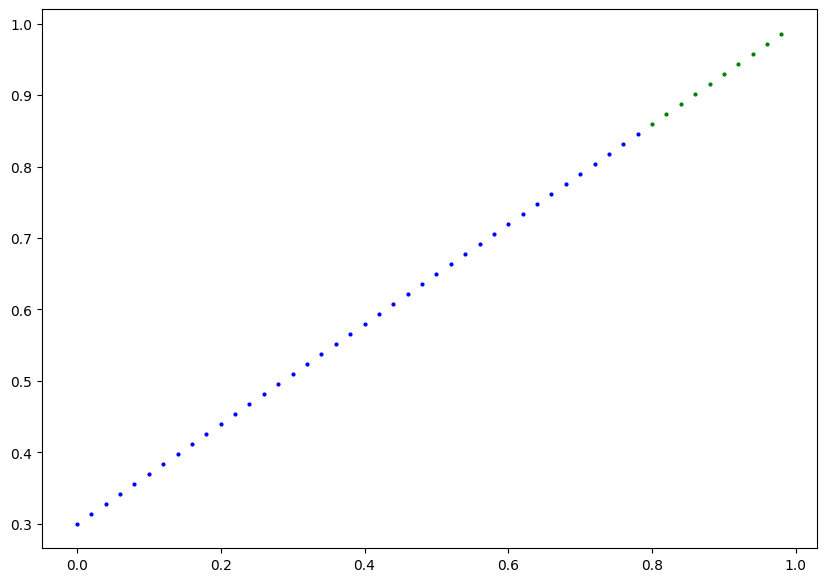

In [103]:
# Plot the data

plot_predictions()

## 6.2 Building a PyTorch Linear Model

We don't have to describe the parameters ourselves. We will use nn.Linear().

In [104]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Use nn.Linear() for creating the model parameters / also called linear transform, probbling layer, fully connected layer, Dense Layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1) #we have one input for one output


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [105]:
#Instantiating the model and using manual seed for reproductibility.

torch.manual_seed(42)

model_1 = LinearRegressionModel()

In [106]:
model_1

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [107]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [108]:
list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

## 6.3 Sending the model to the agnostic device

In [109]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [110]:
# set the model to use the target device

model_1.to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.4 Training the model

For training we need:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [111]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [112]:
loss_fn

L1Loss()

In [113]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [114]:
# Training Loop

torch.manual_seed(42)

epochs = 200

#Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_train_preds = model_1(X_train)

  # 2. Calculate the loss
  train_loss = loss_fn(y_train_preds, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform Backpropagation
  train_loss.backward()

  #5. Optimizer step
  optimizer.step()

  #### TESTING ###

  model_1.eval()

  with torch.inference_mode():
    y_test_preds = model_1(X_test)

    test_loss = loss_fn(y_test_preds, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(train_loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Training Loss: {train_loss} | Test Loss: {test_loss}")


Epoch: 0 | Training Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Training Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Training Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Training Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Training Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Training Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Training Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Training Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Training Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Training Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Training Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Training Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Training Loss: 0.00126450

In [115]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [116]:
weight, bias

(0.7, 0.3)

In [117]:
train_loss_values

[tensor(0.5552, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.4400, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.3248, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.2095, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0943, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0239, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0200, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0165, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0131, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0097, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0062, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0028, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>

In [118]:
test_loss_values

[tensor(0.5740, device='cuda:0'),
 tensor(0.4393, device='cuda:0'),
 tensor(0.3046, device='cuda:0'),
 tensor(0.1698, device='cuda:0'),
 tensor(0.0351, device='cuda:0'),
 tensor(0.0478, device='cuda:0'),
 tensor(0.0458, device='cuda:0'),
 tensor(0.0375, device='cuda:0'),
 tensor(0.0299, device='cuda:0'),
 tensor(0.0217, device='cuda:0'),
 tensor(0.0141, device='cuda:0'),
 tensor(0.0058, device='cuda:0'),
 tensor(0.0138, device='cuda:0'),
 tensor(0.0138, device='cuda:0'),
 tensor(0.0138, device='cuda:0'),
 tensor(0.0138, device='cuda:0'),
 tensor(0.0138, device='cuda:0'),
 tensor(0.0138, device='cuda:0'),
 tensor(0.0138, device='cuda:0'),
 tensor(0.0138, device='cuda:0')]

## 6.5 Plotting the loss curve

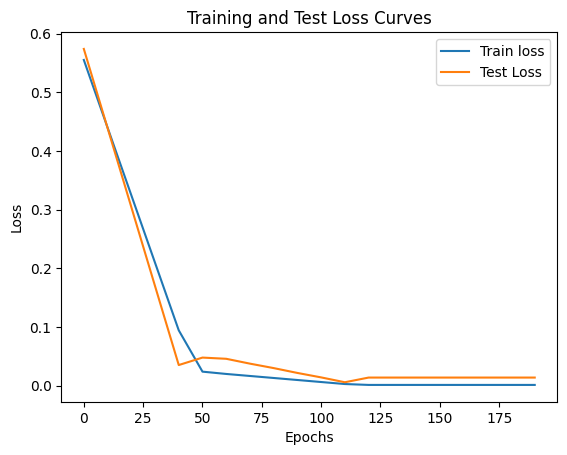

In [122]:
train_loss_values_cpu = [t.cpu().item() for t in train_loss_values]
test_loss_values_cpu = [t.cpu().item() for t in test_loss_values]

plt.plot(epoch_count, np.array(torch.tensor(train_loss_values_cpu).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values_cpu, label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## 6.6 Making Predictions with out Trainined Model

In [123]:
model_1.eval()
with torch.inference_mode():
  y_preds_new = model_1(X_test)

In [124]:
y_preds_new

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

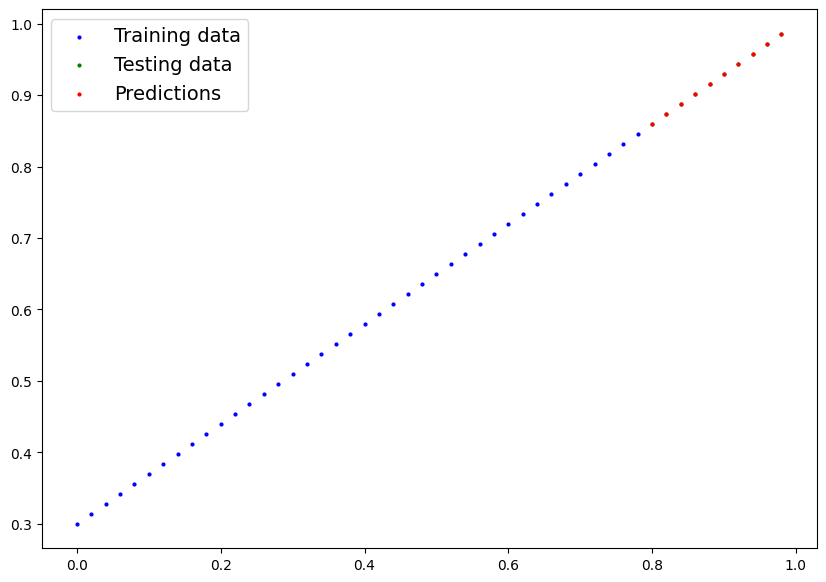

In [125]:
plot_predictions(predictions = y_preds_new.cpu())

## 6.7 Saving and loading a our trained model

In [128]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [129]:
# Loading a PyTorch Model

# create a new instance of our linear regression model
loaded_model_1 = LinearRegressionModel()

# Load the model saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [130]:
next(loaded_model_1.parameters())

Parameter containing:
tensor([[0.6968]], device='cuda:0', requires_grad=True)

In [131]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [132]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds_new == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')